# Simple MNIST NN from scratch

In this notebook, I implemented a simple two-layer neural network and trained it on the MNIST digit recognizer dataset. It's meant to be an instructional example, through which you can understand the underlying math of neural networks better.

In [12]:
!pip install numpy pandas matplotlib


[notice] A new release of pip is available: 23.0.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [13]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

data = pd.read_csv('train.csv')

In [14]:
data = np.array(data)
m, n = data.shape
np.random.shuffle(data)


# data_dev = data[0:1000].T
# Y_dev = data_dev[0]
# X_dev = data_dev[1:, :]  
# X_dev = X_dev / 255.


# data_train = data[1000:m].T
# Y_train = data_train[0]
# X_train = data_train[1:, :]  
# X_train = X_train / 255.
# _, m_train = X_train.shape


from sklearn.model_selection import train_test_split

X = data[:, 1:]  # Features
Y = data[:, 0]   # Labels

# Split data into training and development sets
X_train, X_dev, Y_train, Y_dev = train_test_split(X, Y, test_size=1000, random_state=42)

# Normalize pixel values
X_train = X_train.T / 255.
X_dev = X_dev.T / 255.


In [15]:
Y_train

array([2, 6, 1, ..., 1, 0, 1], dtype=int64)

In [16]:
def init_params():
    W1 = np.random.rand(10, 784) - 0.5
    b1 = np.random.rand(10, 1) - 0.5
    W2 = np.random.rand(10, 10) - 0.5
    b2 = np.random.rand(10, 1) - 0.5
    return W1, b1, W2, b2

def ReLU(Z):
    return np.maximum(Z, 0)

def softmax(Z):
    A = np.exp(Z) / sum(np.exp(Z))
    return A
    
def forward_prop(W1, b1, W2, b2, X):
    Z1 = W1.dot(X) + b1
    A1 = ReLU(Z1)
    Z2 = W2.dot(A1) + b2
    A2 = softmax(Z2)
    return Z1, A1, Z2, A2

def ReLU_deriv(Z):
    return Z > 0

def one_hot(Y):
    one_hot_Y = np.zeros((Y.size, Y.max() + 1))
    one_hot_Y[np.arange(Y.size), Y] = 1
    one_hot_Y = one_hot_Y.T
    return one_hot_Y

def backward_prop(Z1, A1, Z2, A2, W1, W2, X, Y):
    one_hot_Y = one_hot(Y)
    dZ2 = A2 - one_hot_Y
    dW2 = 1 / m * dZ2.dot(A1.T)
    db2 = 1 / m * np.sum(dZ2)
    dZ1 = W2.T.dot(dZ2) * ReLU_deriv(Z1)
    dW1 = 1 / m * dZ1.dot(X.T)
    db1 = 1 / m * np.sum(dZ1)
    return dW1, db1, dW2, db2

def update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha):
    W1 = W1 - alpha * dW1
    b1 = b1 - alpha * db1    
    W2 = W2 - alpha * dW2  
    b2 = b2 - alpha * db2    
    return W1, b1, W2, b2

In [17]:
def get_predictions(A2):
    return np.argmax(A2, 0)

def get_accuracy(predictions, Y):
    print(predictions, Y)
    return np.sum(predictions == Y) / Y.size

def gradient_descent(X, Y, alpha, iterations):
    W1, b1, W2, b2 = init_params()
    for i in range(iterations):
        Z1, A1, Z2, A2 = forward_prop(W1, b1, W2, b2, X)
        dW1, db1, dW2, db2 = backward_prop(Z1, A1, Z2, A2, W1, W2, X, Y)
        W1, b1, W2, b2 = update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha)
        if i % 10 == 0:
            print("Iteration: ", i)
            predictions = get_predictions(A2)
            print(get_accuracy(predictions, Y))
    return W1, b1, W2, b2

In [18]:
W1, b1, W2, b2 = gradient_descent(X_train, Y_train, 0.12, 500)

Iteration:  0
[6 6 6 ... 6 6 6] [2 6 1 ... 1 0 1]
0.06629268292682927
Iteration:  10
[5 6 5 ... 6 0 3] [2 6 1 ... 1 0 1]
0.15365853658536585
Iteration:  20
[5 6 5 ... 9 0 3] [2 6 1 ... 1 0 1]
0.20546341463414633
Iteration:  30
[5 6 1 ... 1 0 3] [2 6 1 ... 1 0 1]
0.25602439024390244
Iteration:  40
[5 6 1 ... 1 0 3] [2 6 1 ... 1 0 1]
0.332609756097561
Iteration:  50
[5 6 1 ... 1 0 3] [2 6 1 ... 1 0 1]
0.3988536585365854
Iteration:  60
[9 6 1 ... 1 0 3] [2 6 1 ... 1 0 1]
0.44802439024390245
Iteration:  70
[9 6 1 ... 1 0 3] [2 6 1 ... 1 0 1]
0.4921463414634146
Iteration:  80
[9 6 1 ... 1 0 9] [2 6 1 ... 1 0 1]
0.5309512195121951
Iteration:  90
[9 6 1 ... 1 0 9] [2 6 1 ... 1 0 1]
0.5622926829268293
Iteration:  100
[5 6 1 ... 1 0 9] [2 6 1 ... 1 0 1]
0.592390243902439
Iteration:  110
[2 6 1 ... 1 0 9] [2 6 1 ... 1 0 1]
0.6214146341463415
Iteration:  120
[2 6 1 ... 1 0 1] [2 6 1 ... 1 0 1]
0.6490731707317073
Iteration:  130
[2 6 1 ... 1 0 1] [2 6 1 ... 1 0 1]
0.6749024390243903
Iteration:  14

~85% accuracy on training set.

In [19]:
def make_predictions(X, W1, b1, W2, b2):
    _, _, _, A2 = forward_prop(W1, b1, W2, b2, X)
    predictions = get_predictions(A2)
    return predictions

def test_prediction(index, W1, b1, W2, b2):
    current_image = X_train[:, index, None]
    prediction = make_predictions(X_train[:, index, None], W1, b1, W2, b2)
    label = Y_train[index]
    print("Prediction: ", prediction)
    print("Label: ", label)
    
    current_image = current_image.reshape((28, 28)) * 255
    plt.gray()
    plt.imshow(current_image, interpolation='nearest')
    plt.show()

Let's look at a couple of examples:

Prediction:  [8]
Label:  3


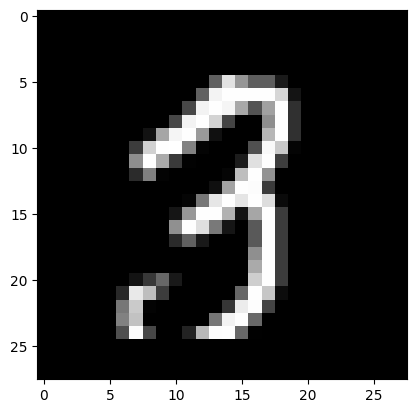

Prediction:  [5]
Label:  5


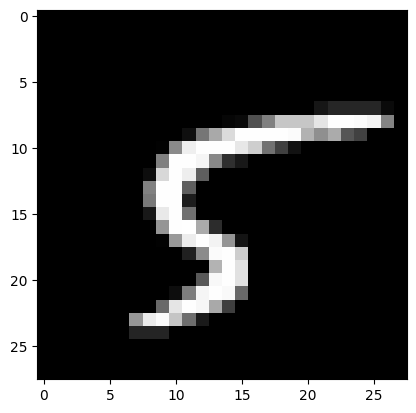

Prediction:  [7]
Label:  7


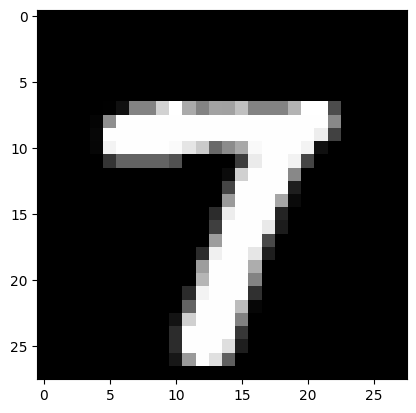

Prediction:  [1]
Label:  1


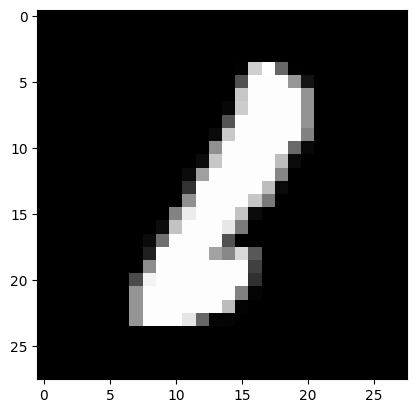

In [23]:
test_prediction(3, W1, b1, W2, b2)
test_prediction(11, W1, b1, W2, b2)
test_prediction(12, W1, b1, W2, b2)
test_prediction(13, W1, b1, W2, b2)

Finally, let's find the accuracy on the dev set:

In [10]:
dev_predictions = make_predictions(X_dev, W1, b1, W2, b2)
get_accuracy(dev_predictions, Y_dev)

[9 6 2 3 7 0 5 6 7 6 2 1 9 4 8 5 6 3 9 5 4 0 0 9 8 8 4 3 1 8 4 7 3 2 3 4 9
 4 5 2 3 4 7 2 1 3 3 7 3 7 9 0 1 3 2 7 4 8 3 9 3 3 0 9 9 8 0 9 2 0 6 1 4 7
 3 6 1 4 8 9 6 2 8 8 4 1 2 9 4 8 3 9 5 3 0 5 2 6 0 1 6 6 6 0 2 7 0 1 0 9 2
 4 0 8 0 0 7 9 2 4 2 8 5 0 6 9 2 6 8 0 5 9 2 5 4 7 0 6 6 1 4 3 0 3 2 9 6 9
 3 1 5 5 7 0 6 7 8 6 9 7 0 0 2 1 2 3 6 4 3 7 7 4 3 6 2 7 0 4 1 3 2 3 8 0 6
 5 8 1 8 2 1 4 6 7 2 6 6 1 4 2 3 7 7 3 1 9 6 7 4 9 6 4 3 7 5 5 9 5 8 7 5 3
 3 3 3 4 1 0 2 5 0 7 9 9 8 5 6 7 6 1 6 6 4 6 0 4 9 8 2 2 0 3 1 1 6 5 4 7 2
 1 6 7 6 1 9 8 9 1 7 1 9 4 2 1 0 9 2 3 7 3 9 3 4 7 6 3 9 2 1 6 2 5 0 3 4 6
 4 6 2 1 1 5 1 3 7 4 1 4 9 3 3 7 4 2 5 1 6 9 0 9 3 0 5 6 5 6 9 4 4 4 8 7 9
 7 1 5 1 9 9 3 2 9 4 7 5 7 6 1 0 1 0 4 3 9 5 5 8 1 2 7 1 6 5 9 2 1 9 1 8 1
 1 2 2 5 5 6 5 8 7 7 1 2 8 5 4 9 5 4 2 9 8 9 8 8 7 0 7 4 4 8 4 7 2 3 6 4 1
 0 5 4 6 7 1 8 3 4 8 1 8 8 7 3 0 1 8 5 4 0 7 7 7 1 1 5 9 7 9 7 6 7 3 3 4 6
 1 1 3 3 6 8 5 7 0 0 9 1 8 6 0 7 9 3 1 6 1 3 2 4 4 0 0 3 2 3 2 6 9 7 6 4 6
 5 3 6 2 9 1 3 4 5 5 2 9 

0.852